# Exploration — database/evenements.csv

Ce notebook explore la table **evenements** (intrusions).

Fichier: `database/evenements.csv`
Points clés:
- Volumes: events par type / zone / caméra
- Timeline via `t_sync` (temps synchronisé multi-caméras)
- Durées (surtout pour `intrusion_ended`)
- Transitions (prev_camera → next_camera)

In [2]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

DATA_PATH = Path('../database/evenements.csv')
assert DATA_PATH.exists(), f'File not found: {DATA_PATH.resolve()}'

df = pd.read_csv(DATA_PATH)
df.shape, df.columns.tolist()

((262, 15),
 ['event_uid',
  'run_id',
  'timestamp',
  'event_type',
  'video_id',
  'track_id',
  'class_name',
  'global_id',
  'zone_id',
  'duration',
  'frame_id',
  't',
  't_sync',
  'prev_camera',
  'next_camera'])

In [3]:
display(df.head(10))

# Parse timestamp + numeric
if 'timestamp' in df.columns:
    df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

for c in ['duration', 'frame_id', 't', 't_sync', 'global_id']:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors='coerce')

display(df.describe(include='all').T)

,event_uid,run_id,timestamp,event_type,video_id,track_id,class_name,global_id,zone_id,duration,frame_id,t,t_sync,prev_camera,next_camera
0,20260112_211653::CAMERA_DEBUT_COULOIR_DROIT::p...,20260112_211653,2026-01-12 21:19:22,intrusion_confirmed,CAMERA_DEBUT_COULOIR_DROIT,person:10,person,1.0,ZONE_STOCKAGE,0.000000,270,11.400219,696.400219,CAMERA_HALL_PORTE_GAUCHE,CAMERA_HALL_PORTE_GAUCHE
1,20260112_211653::CAMERA_DEBUT_COULOIR_DROIT::p...,20260112_211653,2026-01-12 21:19:22,intrusion_ended,CAMERA_DEBUT_COULOIR_DROIT,person:10,person,1.0,ZONE_STOCKAGE,2.232684,336,13.632903,698.632903,CAMERA_HALL_PORTE_GAUCHE,CAMERA_HALL_PORTE_GAUCHE
2,20260112_211653::CAMERA_DEBUT_COULOIR_DROIT::p...,20260112_211653,2026-01-12 21:19:22,intrusion_confirmed,CAMERA_DEBUT_COULOIR_DROIT,person:21,person,1.0,ZONE_STOCKAGE,0.000000,960,35.655284,720.655284,CAMERA_HALL_PORTE_GAUCHE,CAMERA_HALL_PORTE_GAUCHE
3,20260112_211653::CAMERA_DEBUT_COULOIR_DROIT::p...,20260112_211653,2026-01-12 21:19:22,intrusion_ended,CAMERA_DEBUT_COULOIR_DROIT,person:21,person,1.0,ZONE_STOCKAGE,1.623770,1008,37.279054,722.279054,CAMERA_HALL_PORTE_GAUCHE,CAMERA_ESCALIER_DEBUT_COULOIR_GAUCHE
4,20260112_211653::CAMERA_DEBUT_COULOIR_DROIT::p...,20260112_211653,2026-01-12 21:19:22,intrusion_confirmed,CAMERA_DEBUT_COULOIR_DROIT,person:21,person,1.0,ZONE_STOCKAGE,0.000000,1009,37.312883,722.312883,CAMERA_HALL_PORTE_GAUCHE,CAMERA_ESCALIER_DEBUT_COULOIR_GAUCHE
5,20260112_211653::CAMERA_DEBUT_COULOIR_DROIT::p...,20260112_211653,2026-01-12 21:19:22,intrusion_ended,CAMERA_DEBUT_COULOIR_DROIT,person:21,person,1.0,ZONE_STOCKAGE,0.033829,1010,37.346712,722.346712,CAMERA_HALL_PORTE_GAUCHE,CAMERA_ESCALIER_DEBUT_COULOIR_GAUCHE
6,20260112_211653::CAMERA_DEBUT_COULOIR_DROIT::p...,20260112_211653,2026-01-12 21:19:22,intrusion_confirmed,CAMERA_DEBUT_COULOIR_DROIT,person:21,person,1.0,ZONE_STOCKAGE,0.000000,1011,37.380540,722.380540,CAMERA_HALL_PORTE_GAUCHE,CAMERA_ESCALIER_DEBUT_COULOIR_GAUCHE
7,20260112_211653::CAMERA_DEBUT_COULOIR_DROIT::p...,20260112_211653,2026-01-12 21:19:22,intrusion_ended,CAMERA_DEBUT_COULOIR_DROIT,person:21,person,1.0,ZONE_STOCKAGE,0.541257,1027,37.921797,722.921797,CAMERA_HALL_PORTE_GAUCHE,CAMERA_ESCALIER_DEBUT_COULOIR_GAUCHE
8,20260112_211653::CAMERA_DEBUT_COULOIR_DROIT::p...,20260112_211653,2026-01-12 21:19:22,intrusion_confirmed,CAMERA_DEBUT_COULOIR_DROIT,person:21,person,1.0,ZONE_STOCKAGE,0.000000,1056,38.902825,723.902825,CAMERA_HALL_PORTE_GAUCHE,CAMERA_ESCALIER_DEBUT_COULOIR_GAUCHE
9,20260112_211653::CAMERA_DEBUT_COULOIR_DROIT::p...,20260112_211653,2026-01-12 21:19:22,intrusion_ended,CAMERA_DEBUT_COULOIR_DROIT,person:21,person,1.0,ZONE_STOCKAGE,0.067657,1058,38.970482,723.970482,CAMERA_HALL_PORTE_GAUCHE,CAMERA_ESCALIER_DEBUT_COULOIR_GAUCHE


,count,unique,top,freq,mean,min,25%,50%,75%,max,std
event_uid,262,262,20260112_211653::CAMERA_DEBUT_COULOIR_DROIT::p...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
run_id,262,1,20260112_211653,262,NaN,NaN,NaN,NaN,NaN,NaN,NaN
timestamp,262,NaN,NaN,NaN,2026-01-12 21:19:39.091603200,2026-01-12 21:19:22,2026-01-12 21:19:24,2026-01-12 21:19:42,2026-01-12 21:19:51,2026-01-12 21:19:52,NaN
event_type,262,2,intrusion_confirmed,131,NaN,NaN,NaN,NaN,NaN,NaN,NaN
video_id,262,5,CAMERA_HALL_PORTE_ENTREE,106,NaN,NaN,NaN,NaN,NaN,NaN,NaN
track_id,262,93,person:21,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
class_name,262,1,person,262,NaN,NaN,NaN,NaN,NaN,NaN,NaN
global_id,258.0,NaN,NaN,NaN,2.937984,1.0,1.0,1.0,2.0,18.0,3.543508
zone_id,262,5,ZONE_BUREAU_DIRECTEUR,106,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,262.0,NaN,NaN,NaN,0.884847,0.0,0.0,0.0,0.625861,42.826936,3.397728


event_type
intrusion_confirmed    131
intrusion_ended        131
Name: count, dtype: int64

zone_id
ZONE_BUREAU_DIRECTEUR    106
ZONE_STOCKAGE             82
ZONE_2                    36
ZONE_SALLE_SERVEUR        26
ZONE_1                    12
Name: count, dtype: int64

video_id
CAMERA_HALL_PORTE_ENTREE                  106
CAMERA_DEBUT_COULOIR_DROIT                 82
CAMERA_FIN_COULOIR_GAUCHE_REZ_PARTIE_2     36
CAMERA_FIN_COULOIR_DROIT                   26
CAMERA_FIN_COULOIR_GAUCHE_REZ_PARTIE_1     12
Name: count, dtype: int64

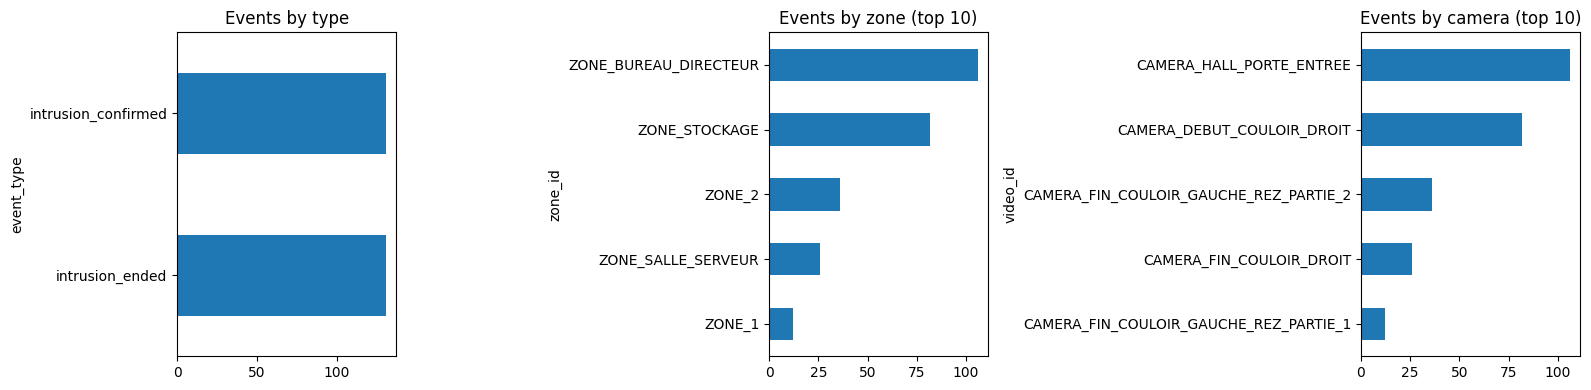

In [4]:
# Counts by category
def vc(col, n=20):
    if col not in df.columns:
        return None
    return df[col].fillna('').replace('', np.nan).dropna().value_counts().head(n)

display(vc('event_type'))
display(vc('zone_id'))
display(vc('video_id'))

fig, axes = plt.subplots(1, 3, figsize=(16, 4))
for ax, col, title in [
    (axes[0], 'event_type', 'Events by type'),
    (axes[1], 'zone_id', 'Events by zone (top 10)'),
    (axes[2], 'video_id', 'Events by camera (top 10)'),
]:
    s = vc(col, n=10)
    if s is None or len(s) == 0:
        ax.axis('off')
        continue
    s.iloc[::-1].plot(kind='barh', ax=ax)
    ax.set_title(title)

plt.tight_layout()
plt.show()

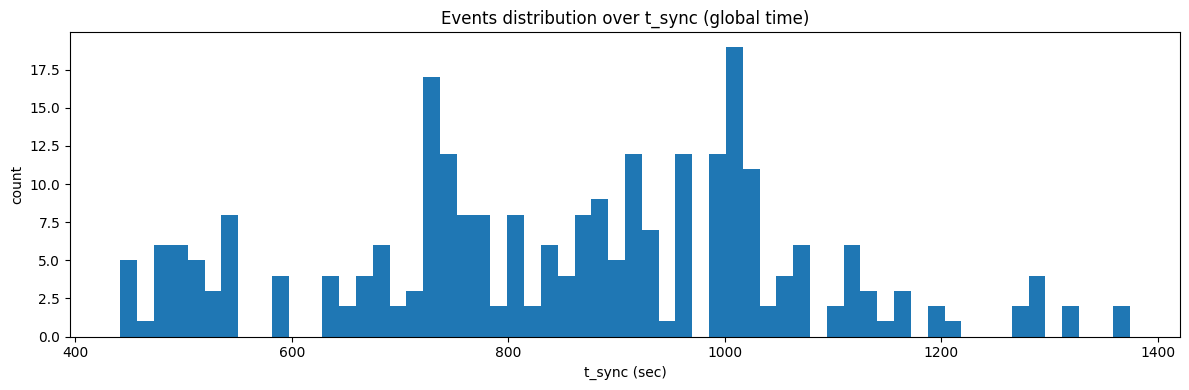

In [5]:
# Timeline: events on global synchronized time
if 't_sync' in df.columns and df['t_sync'].notna().any():
    plt.figure(figsize=(12, 4))
    plt.hist(df['t_sync'].dropna(), bins=60)
    plt.title('Events distribution over t_sync (global time)')
    plt.xlabel('t_sync (sec)')
    plt.ylabel('count')
    plt.tight_layout()
    plt.show()

count    131.000000
mean       1.769694
std        4.647576
min        0.000000
25%        0.267587
50%        0.633791
75%        1.336117
max       42.826936
Name: duration, dtype: float64

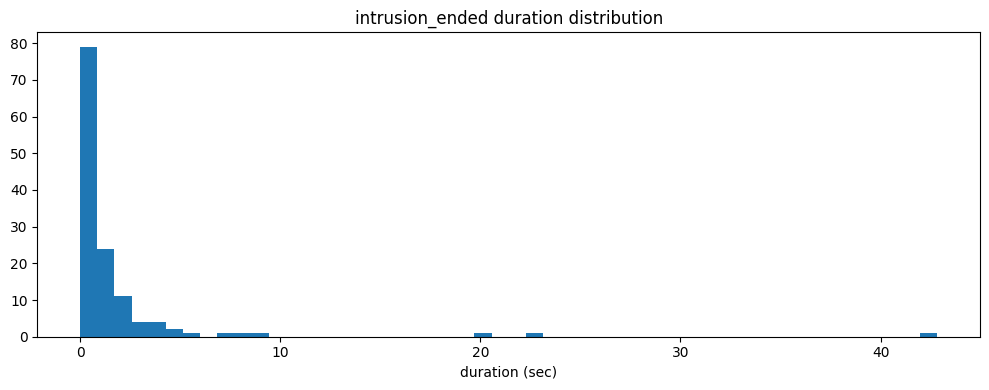

In [6]:
# Duration analysis (mostly meaningful for intrusion_ended)
if 'event_type' in df.columns and 'duration' in df.columns:
    ended = df[df['event_type'].eq('intrusion_ended')].copy()
    display(ended['duration'].describe())

    plt.figure(figsize=(10, 4))
    plt.hist(ended['duration'].dropna(), bins=50)
    plt.title('intrusion_ended duration distribution')
    plt.xlabel('duration (sec)')
    plt.tight_layout()
    plt.show()

,prev_camera,next_camera,count
0,CAMERA_HALL_PORTE_GAUCHE,CAMERA_HALL_PORTE_GAUCHE,31
1,CAMERA_FIN_COULOIR_DROIT,CAMERA_HALL_PORTE_GAUCHE,21
2,CAMERA_HALL_PORTE_GAUCHE,CAMERA_ESCALIER_DEBUT_COULOIR_GAUCHE,17
3,CAMERA_FIN_COULOIR_DROIT,CAMERA_FIN_COULOIR_DROIT,15
4,CAMERA_HALL_PORTE_DROITE,CAMERA_HALL_PORTE_DROITE,13
5,CAMERA_DEVANTURE_PORTE_ENTREE,CAMERA_HALL_PORTE_GAUCHE,12
6,CAMERA_HALL_PORTE_DROITE,CAMERA_FIN_COULOIR_GAUCHE_REZ_PARTIE_1,12
7,CAMERA_HALL_PORTE_GAUCHE,CAMERA_DEVANTURE_PORTE_ENTREE,9
8,CAMERA_FIN_COULOIR_GAUCHE_REZ_PARTIE_1,CAMERA_FIN_COULOIR_GAUCHE_REZ_PARTIE_1,8
10,CAMERA_FIN_COULOIR_DROIT,CAMERA_DEVANTURE_SOUS_ARBRE,7


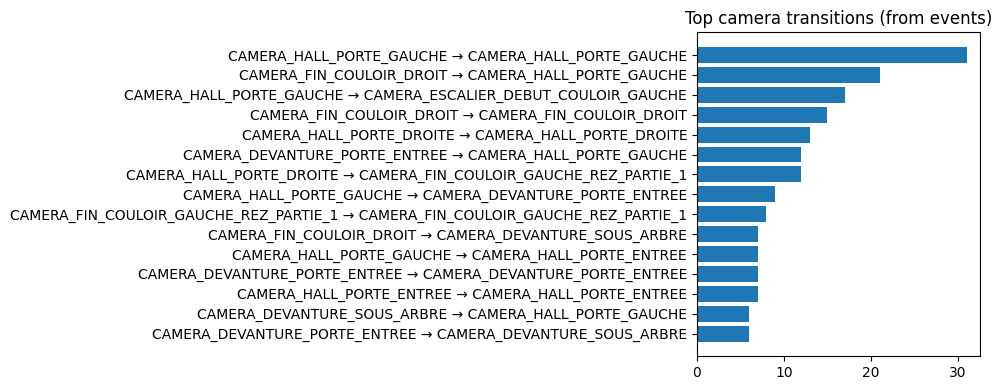

In [8]:
# Transitions prev_camera -> next_camera
if {'prev_camera','next_camera'}.issubset(df.columns):
    trans = (
        df[['prev_camera','next_camera']]
        .fillna('')
        .loc[lambda x: (x['prev_camera'] != '') & (x['next_camera'] != '')]
        .value_counts()
        .reset_index(name='count')
        .sort_values('count', ascending=False)
    )
    display(trans.head(20))

    top = trans.head(15).copy()
    plt.figure(figsize=(10, 4))
    plt.barh([f"{a} → {b}" for a, b in zip(top['prev_camera'], top['next_camera'])][::-1], top['count'].iloc[::-1])
    plt.title('Top camera transitions (from events)')
    plt.tight_layout()
    plt.show()